<a href="https://colab.research.google.com/github/dcthyun0308/ESAA/blob/main/YB2%EC%A1%B0_miniproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YB2조 mini project1

In [8]:
!apt-get -qq update
!apt-get -qq -y install fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sns

In [21]:
FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(FONT_PATH)
nanum = fm.FontProperties(fname=FONT_PATH).get_name()
mpl.rcParams["font.family"] = nanum
mpl.rcParams["font.sans-serif"] = [nanum, "DejaVu Sans"]
mpl.rcParams["axes.unicode_minus"] = False

sns.set_theme(rc={"font.family": nanum, "axes.unicode_minus": False})

In [22]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 살펴보기

In [23]:
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [24]:
df.shape

(600, 12)

In [25]:
df.info() #데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [26]:
df.nunique() #고유값 개수 확인

,0
title,600
distributor,169
genre,12
release_time,330
time,86
screening_rat,4
director,472
dir_prev_bfnum,245
dir_prev_num,6
num_staff,296


In [27]:
print(df.isnull().sum()) #결측치 있는 열 확인

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64


In [28]:
df['dir_prev_bfnum'] = df['dir_prev_bfnum'].fillna(0) #결측치 0으로 채우기
print(df['dir_prev_bfnum'].isnull().sum()) #채우고 결측치 수 다시 확인

0


In [29]:
#이상치 확인
Q1 = df['box_off_num'].quantile(0.25)
Q3 = df['box_off_num'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['box_off_num'] < lower) | (df['box_off_num'] > upper)]
out_num = outliers['box_off_num']

print(f'관객수 이상치 개수: {len(out_num)}')

관객수 이상치 개수: 97


In [30]:
#이상치 로그변환
df["box_off_num"] = np.log1p(df["box_off_num"])  # log(x+1) 변환

df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,10.060449
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,15.771725
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,15.755558
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,12.291640
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,13.088575


In [31]:
df['release_time'] = pd.to_datetime(df['release_time']) #datetime형으로 변환
print(df.info()) #변환 여부 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 56.4+ KB
None


# 1. 장르별 선호 개봉 시기 간의 상관관계

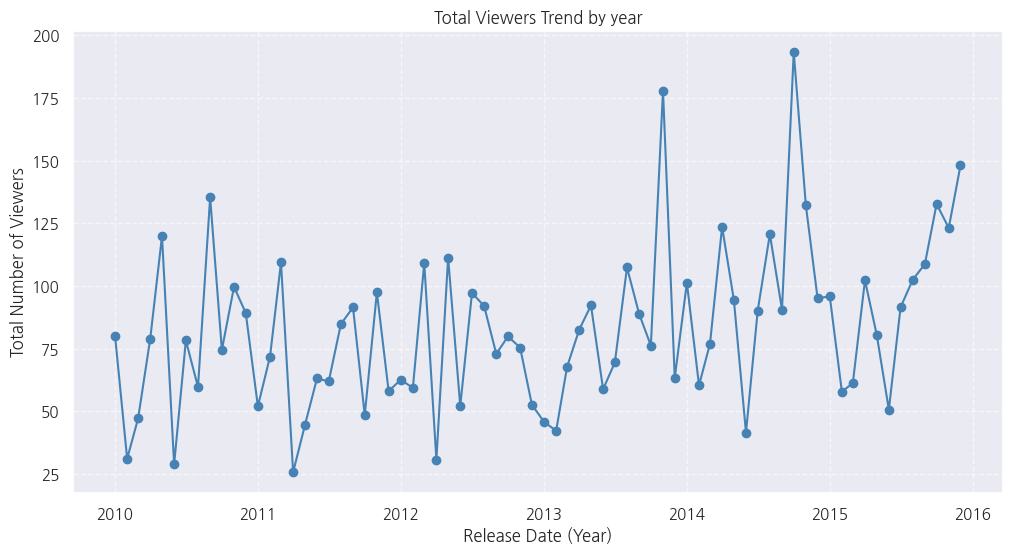

In [37]:
# 연도별 총 관객 수 집계
monthly_viewers = (
    df.groupby(df['release_time'].dt.to_period('M'))['box_off_num']
    .sum()
    .reset_index()
)

# datetime 변환 (to_period -> timestamp)
monthly_viewers['release_time'] = monthly_viewers['release_time'].dt.to_timestamp()

# 라인 차트
plt.figure(figsize=(12,6))
plt.plot(
    monthly_viewers['release_time'],
    monthly_viewers['box_off_num'],
    marker='o', linestyle='-', color='steelblue'
)
plt.title("Total Viewers Trend by year")
plt.xlabel("Release Date (Year)")
plt.ylabel("Total Number of Viewers")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

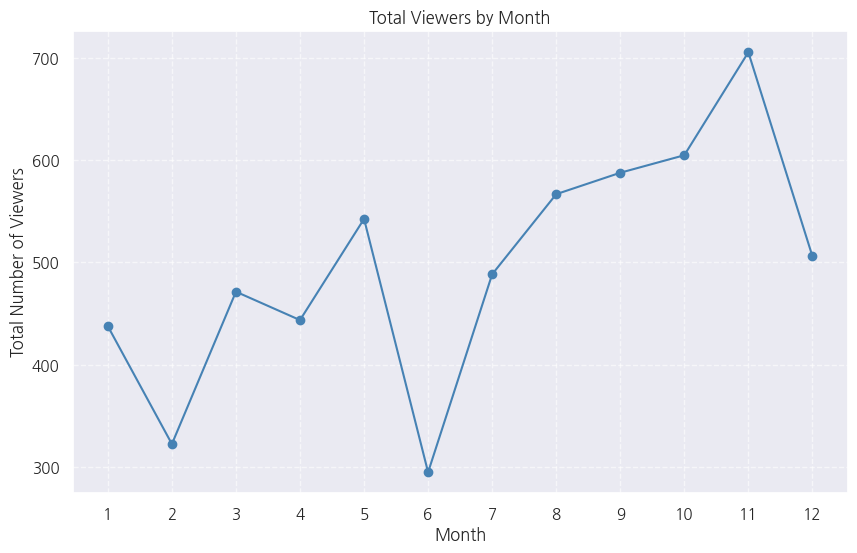

In [38]:
# 월별 총 관객 수 집계
monthly_viewers = (
    df.groupby(df['release_time'].dt.month)['box_off_num']
    .sum()
    .reset_index()
    .rename(columns={'release_time':'month'})
)

# 라인 차트
plt.figure(figsize=(10,6))
plt.plot(
    monthly_viewers['month'],
    monthly_viewers['box_off_num'],
    marker='o', linestyle='-', color='steelblue'
)
plt.title("Total Viewers by Month")
plt.xlabel("Month")
plt.ylabel("Total Number of Viewers")
plt.xticks(range(1,13))  # 1~12월 눈금 고정
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [39]:
df['genre'].unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

In [40]:
# 장르명 매핑 딕셔너리
genre_mapping = {
    '액션': 'Action',
    '느와르': 'Noir',
    '코미디': 'Comedy',
    '다큐멘터리': 'Documentary',
    '뮤지컬': 'Musical',
    '드라마': 'Drama',
    '멜로/로맨스': 'Melodrama/Romance',
    '공포': 'Horror',
    '서스펜스': 'Suspense',
    '애니메이션': 'Animation',
    '미스터리': 'Mystery',
    'SF': 'SF',
}

# 'genre' 열의 값을 딕셔너리에 따라 변경
df['genre'] = df['genre'].replace(genre_mapping)

# 변경된 결과 확인 (예시)
print(df['genre'].unique())

['Action' 'Noir' 'Comedy' 'Documentary' 'Musical' 'Drama'
 'Melodrama/Romance' 'Horror' 'Suspense' 'Animation' 'Mystery' 'SF']


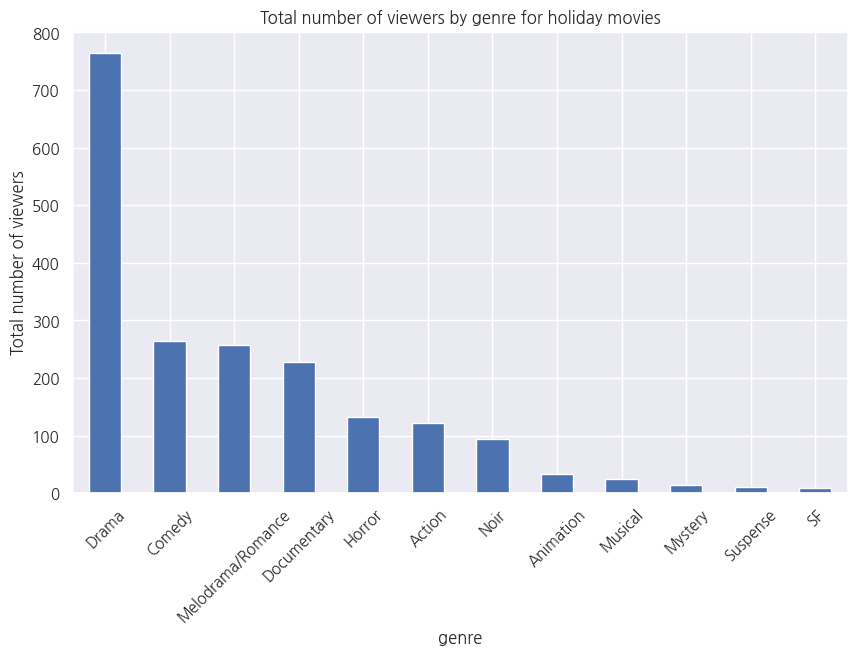

In [41]:
# 명절 필터링: 설(1~2월), 추석(9~10월)
df_holiday = df[df['release_time'].dt.month.isin([1,2,9,10])]

# 장르별 총 관객 수 집계
genre_counts = df_holiday.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)

# 히스토그램(막대 그래프)
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title("Total number of viewers by genre for holiday movies")
plt.xlabel("genre")
plt.ylabel("Total number of viewers")
plt.xticks(rotation=45)
plt.show()

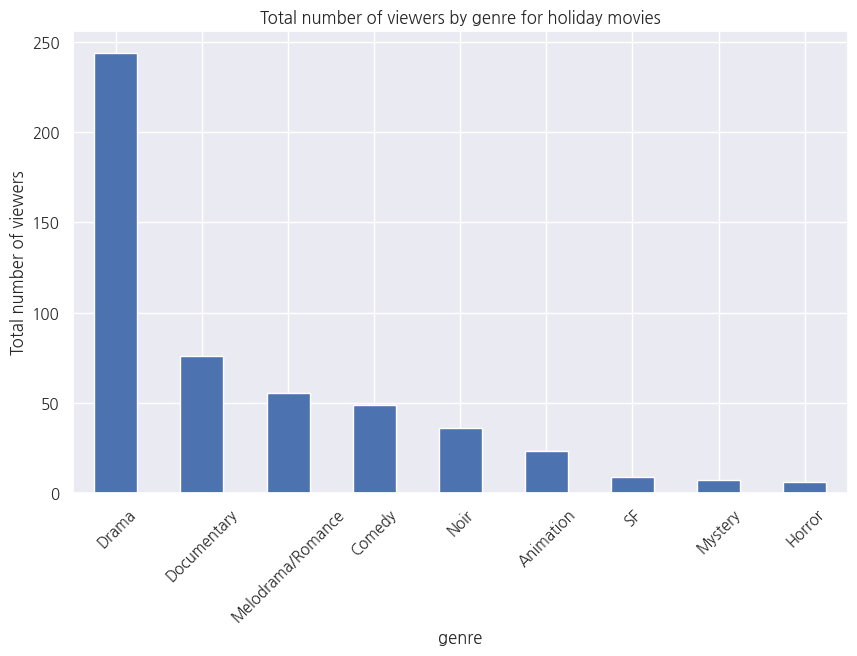

In [42]:
# 명절 필터링: 크리스마스
df_holiday = df[df['release_time'].dt.month.isin([12])]

# 장르별 총 관객 수 집계
genre_counts = df_holiday.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)

# 히스토그램(막대 그래프)
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title("Total number of viewers by genre for holiday movies")
plt.xlabel("genre")
plt.ylabel("Total number of viewers")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3085810556.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'box_off_num'))


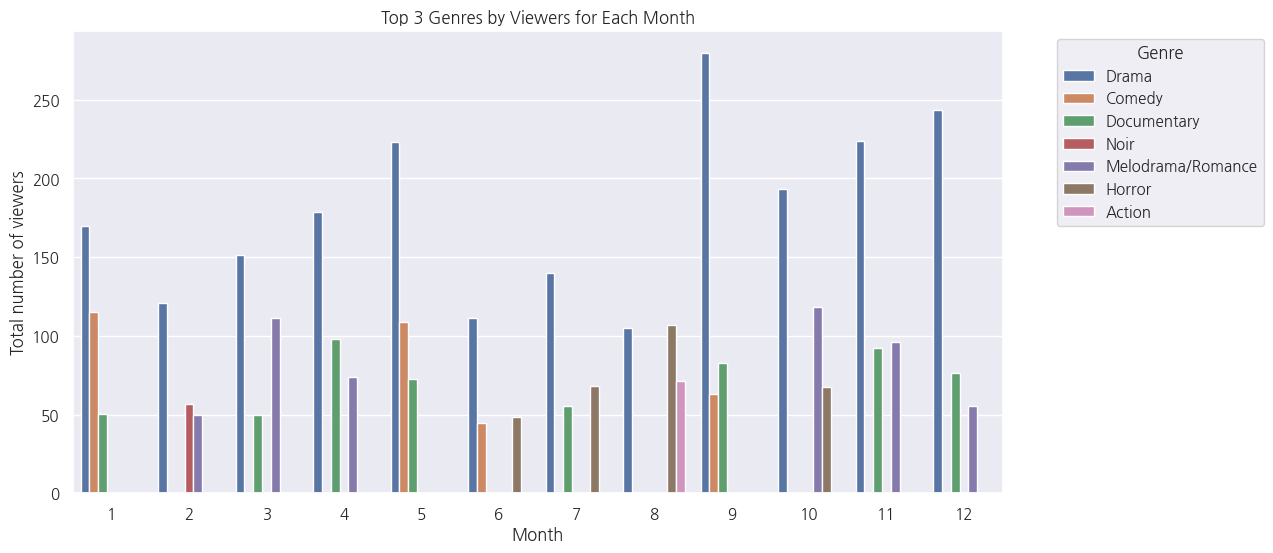

In [43]:
import seaborn as sns

# 월 컬럼 추가
df['month'] = df['release_time'].dt.month

# 월별-장르별 총 관객 수 집계
monthly_genre = (
    df.groupby(['month', 'genre'])['box_off_num']
    .sum()
    .reset_index()
)

# 각 월별 Top3 장르만 추리기
top3_monthly = (
    monthly_genre.groupby('month', group_keys=False)
    .apply(lambda x: x.nlargest(3, 'box_off_num'))
)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top3_monthly,
    x='month',
    y='box_off_num',
    hue='genre'
)
plt.title("Top 3 Genres by Viewers for Each Month")
plt.xlabel("Month")
plt.ylabel("Total number of viewers")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

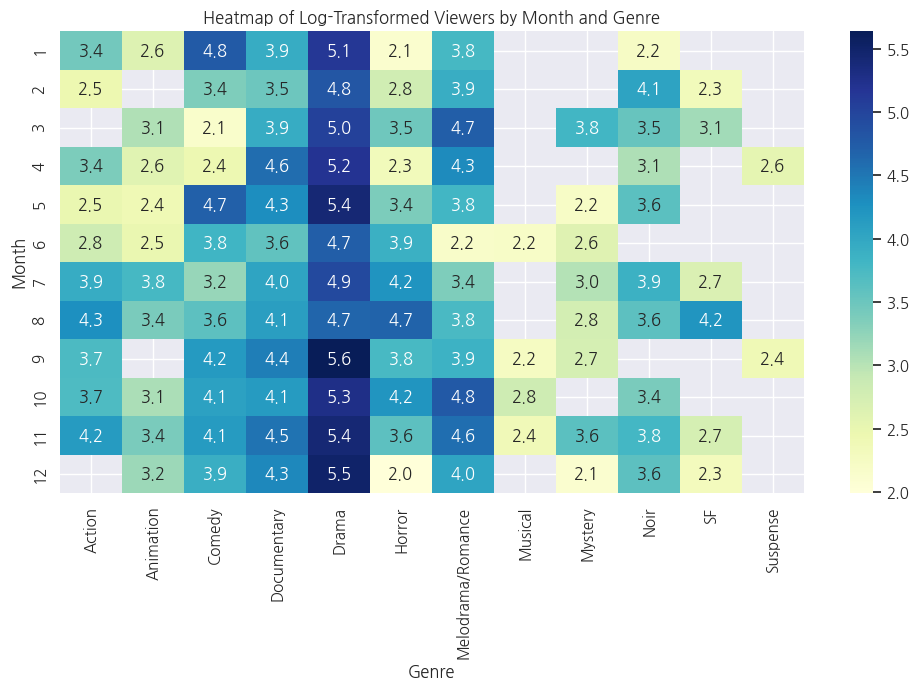

In [44]:
import numpy as np

pivot_log = df.pivot_table(
    index=df['release_time'].dt.month,
    columns='genre',
    values='box_off_num',
    aggfunc=lambda x: np.log1p(x.sum())  # log(1+x)
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_log, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Heatmap of Log-Transformed Viewers by Month and Genre")
plt.xlabel("Genre")
plt.ylabel("Month")
plt.show()

# 2. 스태프 수가 관객 수에 미치는 영향과 장르별 차이

# 스태프 수와 관객 수
- 산점도 및 회귀선

In [32]:
needed = ["genre", "num_staff", "box_off_num"]
missing = [c for c in needed if c not in df.columns]
if missing:
    raise KeyError(f"df에 다음 컬럼이 없습니다: {missing}")

df_plot = df[needed].copy()
df_plot["num_staff"] = pd.to_numeric(df_plot["num_staff"], errors="coerce")
df_plot["box_off_num"] = pd.to_numeric(df_plot["box_off_num"], errors="coerce")
df_plot = df_plot.dropna(subset=["genre","num_staff","box_off_num"])

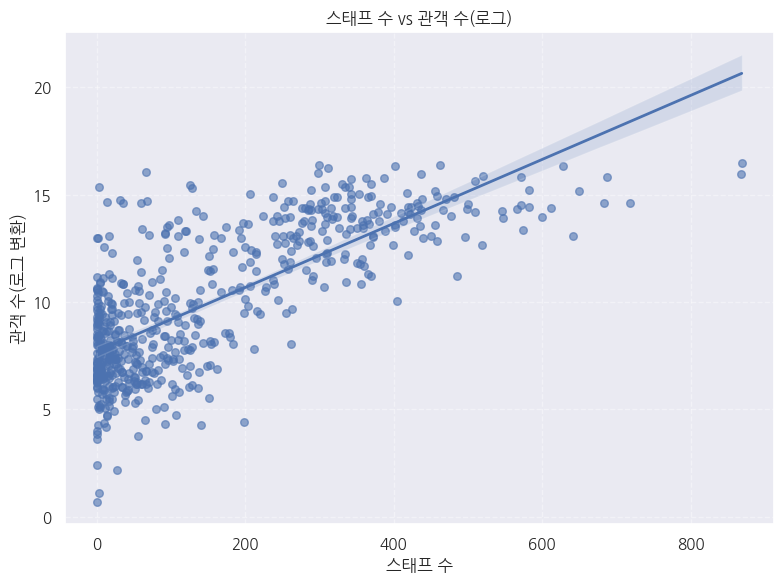

In [33]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_plot,
    x="num_staff",
    y="box_off_num",
    scatter_kws={"alpha": 0.6, "s": 30},
    line_kws={"lw": 2}
)
plt.title("스태프 수 vs 관객 수(로그)")
plt.xlabel("스태프 수")
plt.ylabel("관객 수(로그 변환)")
plt.grid(True, axis="both", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

- 스태프 수가 많을수록 관객 수가 증가하는 경향이 관찰된다.
- 회귀선이 우상향하고 점들이 그 주변에 분포해 정적 상관이 있음을 시사한다.

장르 별 스태프 수
- 장르 별 스태프 수 분포

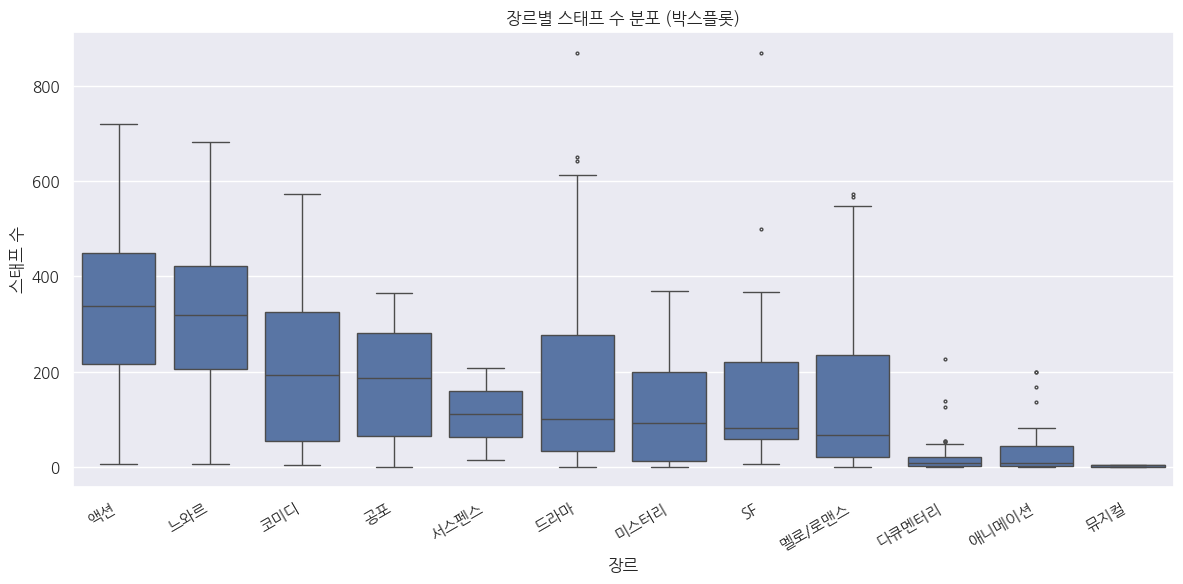

In [34]:
order_med = (df_plot.groupby("genre")["num_staff"]
                      .median()
                      .sort_values(ascending=False)
                      .index)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_plot,
    x="genre",
    y="num_staff",
    order=order_med,
    fliersize=2
)
plt.title("장르별 스태프 수 분포 (박스플롯)")
plt.xlabel("장르")
plt.ylabel("스태프 수")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

- 장르 별 평균 스태프 수

In [35]:
gn_staff = df.groupby('genre')['num_staff'].mean().sort_values(ascending=False)
gn_staff.head(5)

,num_staff
genre,
액션,337.535714
느와르,311.074074
코미디,209.075472
SF,197.307692
공포,176.380952


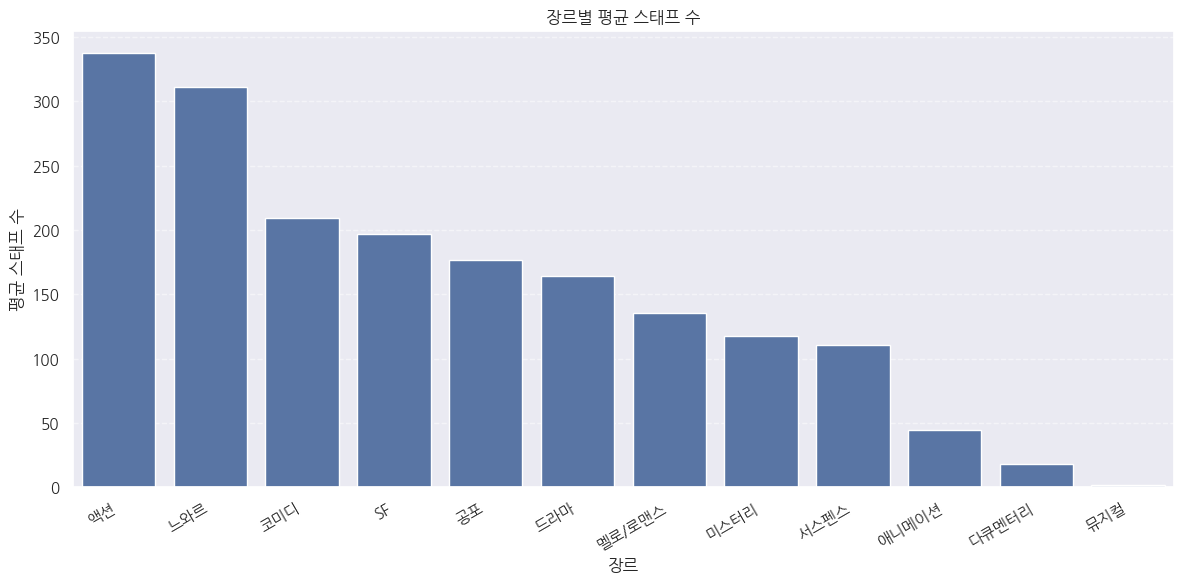

In [36]:
gn_staff = (df_plot.groupby("genre", as_index=False)["num_staff"]
                    .mean()
                    .sort_values("num_staff", ascending=False))

plt.figure(figsize=(12, 6))
sns.barplot(
    data=gn_staff,
    x="genre",
    y="num_staff",
    order=gn_staff["genre"],
    errorbar=None
)
plt.title("장르별 평균 스태프 수")
plt.xlabel("장르")
plt.ylabel("평균 스태프 수")
plt.xticks(rotation=30, ha="right")
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# 3-1. 상영시간과 관객수의 상관관계
1. barplot으로 상영시간 구간별 평균 관객수

In [45]:
# min / max of time
print(df['time'].min())
print(df['time'].max())

45
180


In [48]:
# 상영시간 구간 나눠서 그룹화
bins = [40, 70, 100, 130, 160, 190]
labels = ['40-70분', '70-100분', '100-130분', '130-160분', '160-190분']
# DataFrame에 'time_group' 열 추가
# 연속적인 time 열을 이산적인 구간으로 분류
df['time_group'] = pd.cut(df['time'], bins=bins, labels=labels)

In [50]:
# 상영시간 구간별 평균 관객수
# 분포도 정도를 확인하기 위해 로그변환값으로 이상치의 영향 완화
num_mean = df.groupby('time_group')['box_off_num'].mean()
print(num_mean)

time_group
40-70분       7.123091
70-100분      8.099729
100-130분    11.940671
130-160분    13.202418
160-190분    12.654634
Name: box_off_num, dtype: float64


/tmp/ipython-input-1868159168.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_mean = df.groupby('time_group')['box_off_num'].mean()


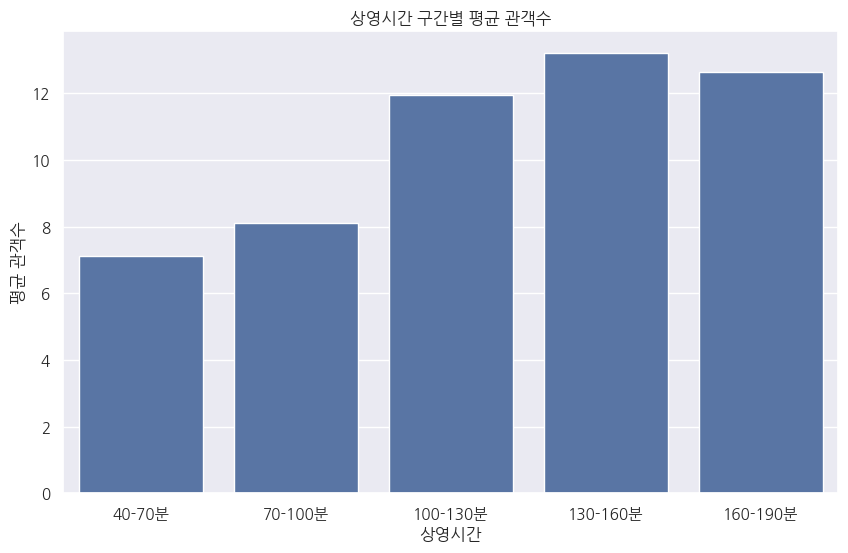

In [51]:
# boxplot으로 시각화
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=num_mean.index, y=num_mean.values)
plt.xlabel('상영시간')
plt.ylabel('평균 관객수')
plt.title('상영시간 구간별 평균 관객수')
plt.show()

2. 산점도로 상영시간과 관객수의 상관관계 확인

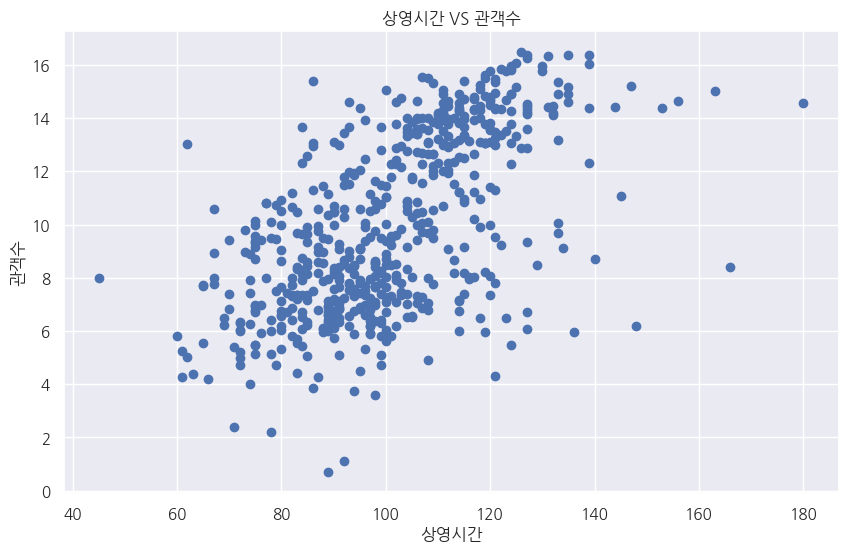

In [52]:
plt.figure(figsize=(10, 6))
# 실제 관객수를 확인하기 위해 실제값을 적용
plt.scatter(df['time'], df['box_off_num'])
plt.xlabel('상영시간')
plt.ylabel('관객수')
plt.title('상영시간 VS 관객수')

plt.show()

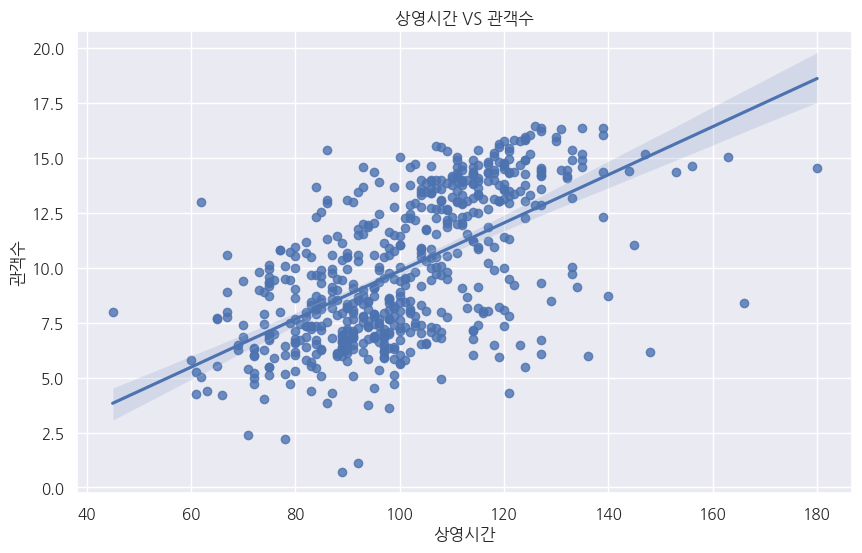

상영시간과 관객수의 상관계수: 0.598


In [53]:
# 상관관계를 명확히 알기 위해 regplot과 상관계수 확인
plt.figure(figsize=(10, 6))
sns.regplot(x='time', y='box_off_num', data=df)
plt.xlabel('상영시간')
plt.ylabel('관객수')
plt.title('상영시간 VS 관객수')

plt.show()

corr = df['time'].corr(df['box_off_num'])
print(f"상영시간과 관객수의 상관계수: {corr:.3f}")

# 3-2. 상영등급과 관객수의 관계

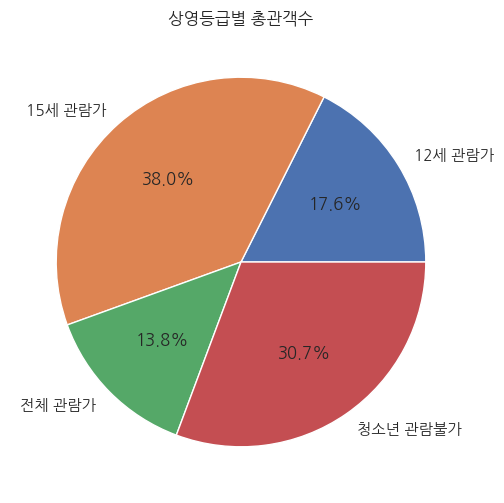

In [55]:
# 원그래프로 시각화
total_bfnum = df.groupby('screening_rat')['box_off_num'].sum()
plt.figure(figsize=(10, 6))
plt.pie(total_bfnum, labels=total_bfnum.index, autopct='%1.1f%%')
plt.title('상영등급별 총관객수')
plt.show()

# 4. 장르별 선호 개봉 시기 간의 상관관계

In [74]:
path = '/content/drive/MyDrive/Colab Notebooks/movies_train.csv'
genre_orig = pd.read_csv(path, usecols=['genre'])
df['genre'] = genre_orig['genre'].values

In [75]:
df['genre'].unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

In [76]:
df['genre'] = df['genre'].astype('category') #장르명을 범주형 변수로 변경

In [77]:
# df['genre'].unique() 값에 해당하는 매핑 딕셔너리 생성 - 한글명은 그래프에서 출력 어려움.
genre_mapping = {
    '액션': 'Action',
    '느와르': 'Noir',
    '코미디': 'Comedy',
    '다큐멘터리': 'Documentary',
    '뮤지컬': 'Musical',
    '공포': 'Horror',
    '서스펜스': 'Suspense',
    '애니메이션': 'Animation',
    '미스터리': 'Mystery',
    'SF': 'SF'
}

In [78]:
# df['genre'] 열의 값을 영어로 변경
df['genre'] = df['genre'].map(genre_mapping)

# 변경된 결과 확인
print(df['genre'].unique())

['Action' 'Noir' 'Comedy' 'Documentary' 'Musical' nan 'Horror' 'Suspense'
 'Animation' 'Mystery' 'SF']


In [79]:
import seaborn as sns

In [80]:
# '월'과 '요일' 변수 생성
df['month'] = df['release_time'].dt.month
df['day_of_week'] = df['release_time'].dt.dayofweek
# dayofweek는 0(월요일)부터 6(일요일)까지

In [81]:
df['genre'].value_counts()

,count
genre,
Documentary,93
Comedy,53
Horror,42
Action,28
Noir,27
Animation,21
Mystery,17
SF,13
Musical,5


# 장르별 개봉 월의 분포

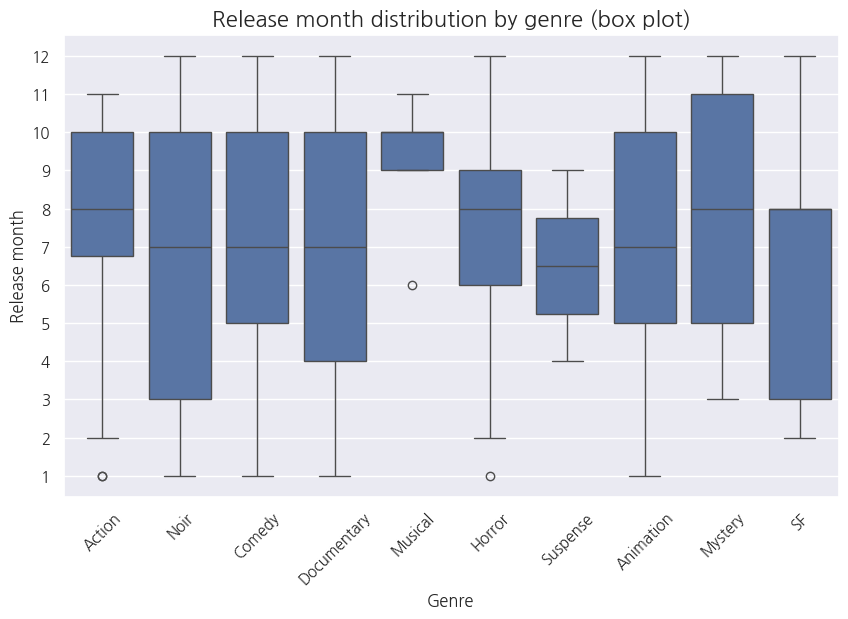

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='month', data=df)
plt.title('Release month distribution by genre (box plot)', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Release month', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(ticks=np.arange(1,13))

plt.show()

- Musical장르의 박스 길이가 가장 짧음. 데이터가 밀집되어있음
- Horror 영화가 여름에 많이 개봉할 것이라는 가설에 적합. (6~9월에 박스 분포)

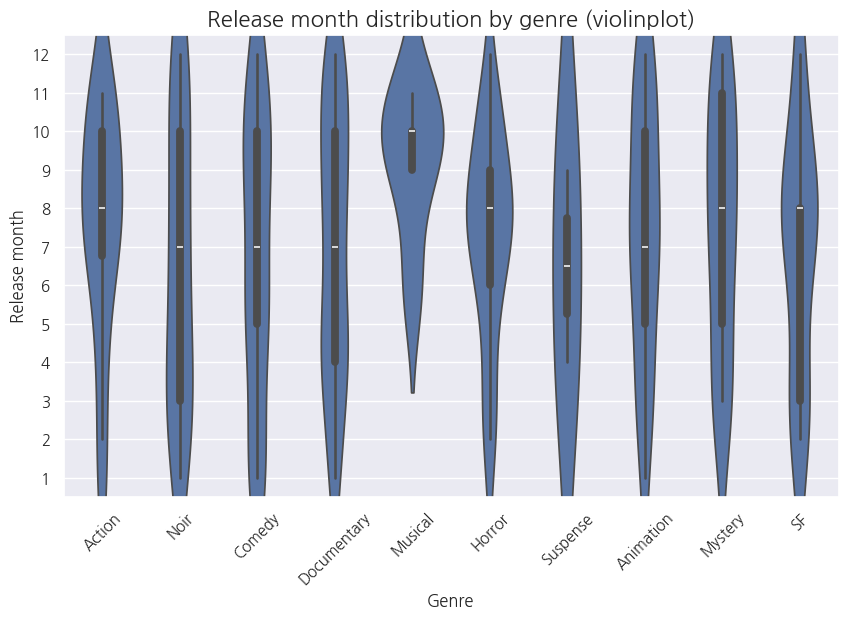

In [83]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='genre', y='month', data=df)
plt.title('Release month distribution by genre (violinplot)', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Release month', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(ticks=np.arange(1,13))

plt.ylim(0.5, 12.5) # 바이올린플롯 그래프의 특성상 확장된 부분을 잘라냄

plt.show()

- Musical 장르에서 뚜렷한 밀집구간을 가짐. 9,10월에 집중적으로 개봉하는 경향이 있는듯함.
- Action, Horror, SR를 제외하고는 바이올린 플롯의 너비가 대체적으로 비슷함. 데이터가 넓은 범위에 고르게 분포되어있음.

# 선호 개봉 요일

In [84]:
df['day_of_week'].unique()

array([3, 2, 0, 4, 5, 1], dtype=int32)

'6'값이 출력되지 않음. 즉 일요일에 개봉한 영화가 없음.

In [86]:
df['day_of_week'].value_counts()

,count
day_of_week,
3,484
2,107
0,4
4,2
1,2
5,1


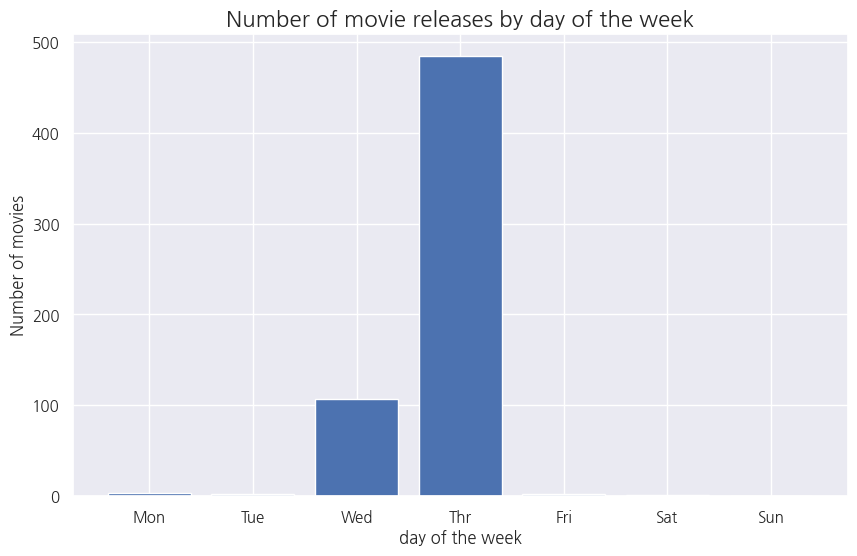

In [87]:
# 요일 이름을 레이블로 사용 (0=월요일, 6=일요일)
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thr', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_of_week_name'] = df['day_of_week'].map(day_map)

# 장르와 상관없이 요일별 개봉 영화 수 계산
release_counts_by_day = df['day_of_week_name'].value_counts()

# 모든 요일을 포함하도록 인덱스 재정렬 (데이터가 없는 일요일도 0으로 표시)
all_days_order = list(day_map.values())
full_counts = release_counts_by_day.reindex(all_days_order, fill_value=0)

# 4. plt.bar를 사용해 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(full_counts.index, full_counts.values)

plt.title('Number of movie releases by day of the week', fontsize=16)
plt.xlabel('day of the week', fontsize=12)
plt.ylabel('Number of movies', fontsize=12)
plt.xticks(rotation=0)
plt.show()

- 목요일이 압도적으로 개봉 영화수가 많고, 수요일 개봉 영화수가 다음으로 많음.
- 월요일이 3번째로 개봉 영화수가 많으나, 사실상 수요일과 목요일에 비하면 다른 요일의 영화 개봉 수 차이는 미미함.

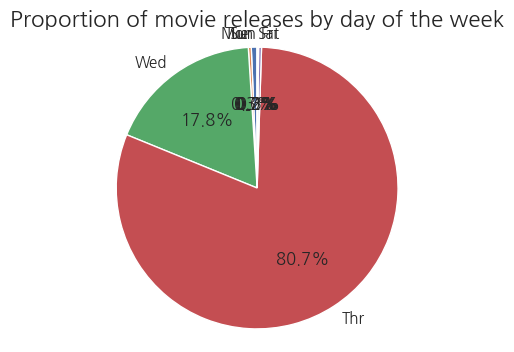

In [88]:
plt.figure(figsize=(4, 4))
plt.pie(full_counts.values, labels=full_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of movie releases by day of the week', fontsize=16)
plt.axis('equal')

plt.show()

- 파이차트로 확인해봐도, 전체 영화의 80.7%가 목요일에 개봉하였고, 17.8%가 수요일에 개봉했음을 알 수 있음.
- 나머지 1.5%만이 월,화,금,토,일요일에 개봉함.

# 2014년 전후 수요일 개봉 영화 차이
2014년 1월부터 시행하는 매달 마지막 수요일을 문화가 있는 날로 제정한 '문화가 있는 날'의 영향이 있는지 분석해보고자 함.

In [89]:
# df['release_year']와 df['day_of_week'] 열 생성
df['release_year'] = df['release_time'].dt.year

In [90]:
# 2014년 이전 데이터 (2014년 제외)
df_before_2014 = df[df['release_year'] < 2014]

# 2014년 이후 데이터 (2014년 포함)
df_since_2014 = df[df['release_year'] >= 2014]

In [91]:
# 1. 2014년 이전 비율 계산
total_before = len(df_before_2014)
wednesday_before = len(df_before_2014[df_before_2014['day_of_week'] == 2])
proportion_before = wednesday_before / total_before if total_before > 0 else 0

# 2. 2014년 이후 비율 계산
total_since = len(df_since_2014)
wednesday_since = len(df_since_2014[df_since_2014['day_of_week'] == 2])
proportion_since = wednesday_since / total_since if total_since > 0 else 0

# 결과 출력
print(f"2014년 이전 수요일 개봉 영화 비율: {proportion_before:.2%}")
print(f"2014년 이후 수요일 개봉 영화 비율: {proportion_since:.2%}")

2014년 이전 수요일 개봉 영화 비율: 16.15%
2014년 이후 수요일 개봉 영화 비율: 20.24%


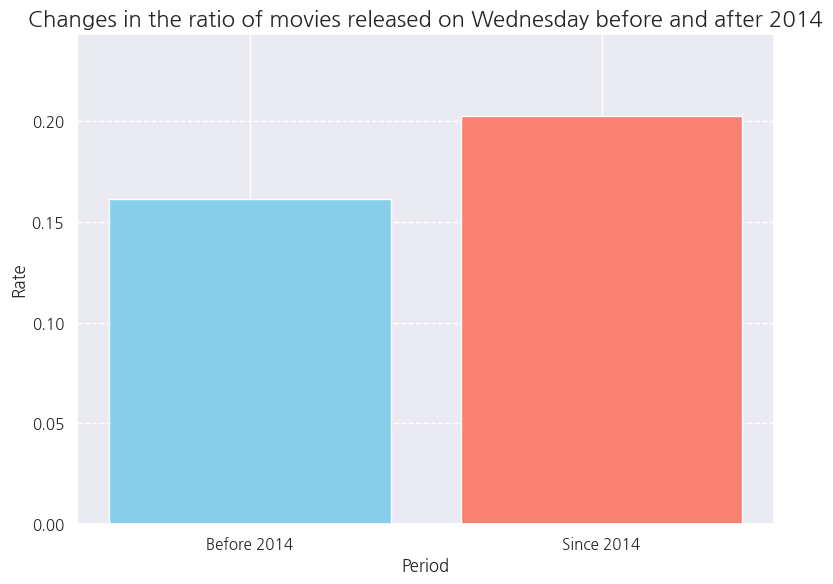

In [92]:
# 비율 데이터를 데이터프레임으로 생성 ... (그냥 재미로 해봄)
proportions = pd.DataFrame({
    'Period': ['Before 2014', 'Since 2014'],
    'Proportion': [proportion_before, proportion_since]
})

plt.figure(figsize=(8, 6))
plt.bar(proportions['Period'], proportions['Proportion'], color=['skyblue', 'salmon'])

plt.title('Changes in the ratio of movies released on Wednesday before and after 2014', fontsize=16)
plt.ylabel('Rate', fontsize=12)
plt.xlabel('Period', fontsize=12)
plt.ylim(0, max(proportion_before, proportion_since) * 1.2) # y축 범위 조정
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# 장르별 선호 개봉 요일

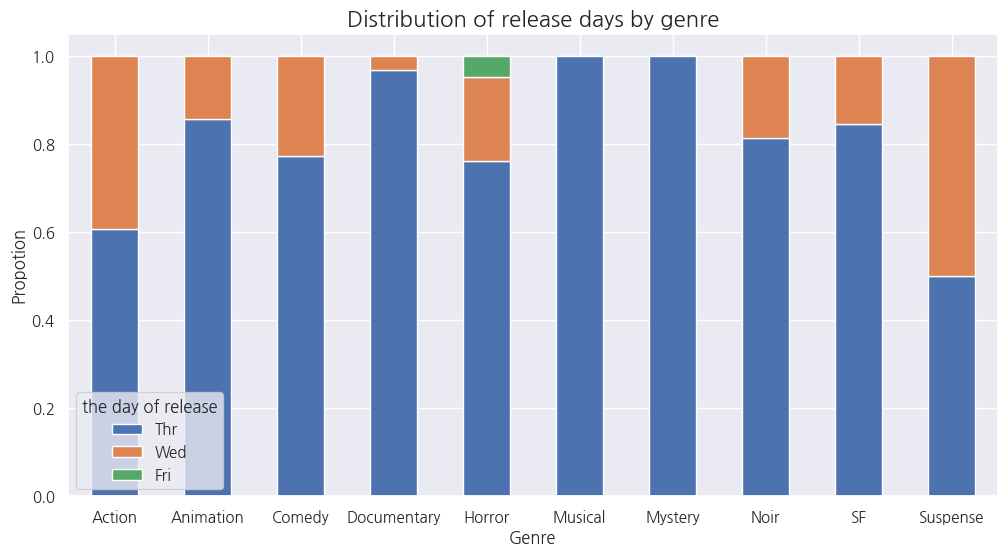

In [93]:
# 요일 이름을 레이블로 사용 (0=월요일, 6=일요일)
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thr', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_of_week_name'] = df['day_of_week'].map(day_map)

# 1. 장르와 요일별로 그룹화하여 개수 집계
genre_by_day = df.groupby(['genre', 'day_of_week_name']).size().unstack(fill_value=0)

# 2. 각 장르의 총합으로 나누어 비율 계산 (axis=1을 사용해 행별 합계로 나눔)
genre_proportions = genre_by_day.div(genre_by_day.sum(axis=1), axis=0)

# 3. 스택형 막대 그래프 그리기
genre_proportions.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Distribution of release days by genre', fontsize=16)
plt.ylabel('Propotion', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='the day of release')
plt.show()

- 전체 영화의 80%가 목요일에 개봉했다보니, 장르별 개봉 요일을 분석했을 때도 목요일의 비율이 높은 편.
- 그나마 Suspense, Action 장르에서 수요일 개봉 비율이 약 40%를 나타냄. 다음으로는 Comedy, Horror 장르가 있음.
- 독특한 점은 Horror 장르에서만 금요일 개봉 비율이 유의미하게 높음.

In [94]:
df[df['day_of_week']==4]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,month,time_group,day_of_week,genre_en,day_of_week_name,release_year
93,화창한 그날들,(주)온비즈넷,Horror,2014-03-14,90,청소년 관람불가,방현준,0.0,0,12,3,5.739793,3,70-100분,4,nan,Fri,2014
129,기생령,(주)이스트스카이필름,Horror,2011-08-05,92,청소년 관람불가,고석진,0.0,0,88,4,11.482394,8,70-100분,4,nan,Fri,2011


- 금요일에 개봉한 2개의 영화가 모두 Horror장르이기 때문인 듯함.
- Horror 영화 42개 중 2개의 영화가 금요일에 개봉, 즉 4.76%의 수치로 그래프에 나타난 것.